# Introduction:

In this project, data on the Bank Indessa is analysed and model is built for predicting the customer which are defaulters in 
order to reduce them for better performance of the Bank.

# Objective :

To predict the customers of Bank Indessa which are defaulters 

# Import Libraries

In [63]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [5]:
data_original= pd.read_csv("E:/ML_Artivatic_dataset/train_indessa.csv") 
data_original.head(5) 

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


# Exploratory Data Analysis

In [6]:
data=data_original.copy() 


In [7]:
data.shape 

(532428, 45)

In [8]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

In [9]:
#Checking the length of columns
for i in data.columns:
    print(len(data[i].unique() ))  

532428
1370
1370
6442
2
105
535
7
35
190125
12
6
33989
3
2
70639
14
39670
917
51
4058
27
24
148
123
74
29
63459
1266
127
2
243149
4046
14024
12574
10
163
2
4
98
9
8082
251641
14698
2


In [10]:
data.describe()  

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,5.324280e+05,532428.000000,532428.000000,532428.000000,532428.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,259874.000000,...,532428.000000,532428.000000,532428.000000,532333.000000,132980.000000,532412.000000,490424.000000,4.904240e+05,4.904240e+05,532428.000000
mean,3.500547e+07,14757.595722,14744.271291,14704.926696,13.242969,7.502984e+04,18.138767,0.314448,0.694603,34.055735,...,0.394954,45.717832,4.859221,0.014299,44.121462,0.005015,213.562222,1.395541e+05,3.208057e+04,0.236327
std,2.412148e+07,8434.420080,8429.139277,8441.290381,4.379611,6.519985e+04,8.369074,0.860045,0.997025,21.884797,...,4.091546,409.647467,63.123361,0.133005,22.198410,0.079117,1958.571538,1.539149e+05,3.805304e+04,0.424826
min,7.047300e+04,500.000000,500.000000,0.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.086688e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.983975e+04,1.400000e+04,0.000000
50%,3.709590e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,...,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.066950e+04,2.370000e+04,0.000000
75%,5.848920e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,2.084792e+05,3.980000e+04,0.000000
max,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,672.520000,30.000000,31.000000,180.000000,...,358.680000,33520.270000,7002.190000,16.000000,180.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000


In [11]:
#Checking Null Values
data.isnull().sum()    

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [12]:
data.isnull().mean()  

member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
batch_enrolled                 0.159926
int_rate                       0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      0.057910
emp_length                     0.050506
home_ownership                 0.000000
annual_inc                     0.000006
verification_status            0.000000
pymnt_plan                     0.000000
desc                           0.858011
purpose                        0.000000
title                          0.000169
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000030
inq_last_6mths                 0.000030
mths_since_last_delinq         0.511908
mths_since_last_record         0.845758


In [13]:
#filling missing values with Mode 
data['batch_enrolled'] = data['batch_enrolled'].fillna(data['batch_enrolled'].mode()[0])
data['emp_length'] = data['emp_length'].fillna(data['emp_length'].mode()[0])
data['desc'] = data['desc'].fillna(data['desc'].mode()[0])
data['verification_status_joint'] = data['verification_status_joint'].fillna(data['verification_status_joint'].mode()[0])

#filling  missing values with Median 
data['mths_since_last_delinq'] = data['mths_since_last_delinq'].fillna(data['mths_since_last_delinq'].median())
data['mths_since_last_record'] = data['mths_since_last_record'].fillna(data['mths_since_last_record'].median())
data['mths_since_last_major_derog'] = data['mths_since_last_major_derog'].fillna(data['mths_since_last_major_derog'].median())

#filling  missing values with 0 values
data["open_acc"].fillna(0,inplace=True)
data["pub_rec"].fillna(0,inplace=True)
data["revol_util"].fillna(0,inplace=True)
data["total_acc"].fillna(0,inplace=True)
data["collections_12_mths_ex_med"].fillna(0,inplace=True)
data["acc_now_delinq"].fillna(0,inplace=True)
data["tot_coll_amt"].fillna(0,inplace=True)
data["tot_cur_bal"].fillna(0,inplace=True)
data["total_rev_hi_lim"].fillna(0,inplace=True)
data["delinq_2yrs"].fillna(0,inplace=True)
data["inq_last_6mths"].fillna(0,inplace=True)
data["annual_inc"].fillna(0,inplace=True)

In [14]:
#As per domain knowledge emp_title and title does not have much impact on target variable so we can drop these columns
data=data.drop(columns=['member_id','emp_title','title'])  

In [15]:
data.columns 

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'batch_enrolled',
       'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'pymnt_plan', 'desc', 'purpose',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'application_type',
       'verification_status_joint', 'last_week_pay', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status'],
      dtype='object')

In [16]:
#Checking null values again
data.isnull().sum() 

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
batch_enrolled                 0
int_rate                       0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
pymnt_plan                     0
desc                           0
purpose                        0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
total_rec_int                  0
total_rec_late_fee             0
recoveries

In [17]:
#checking the duplicated rows
data[data.duplicated()]  

,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_length,home_ownership,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status


Data Visualizations 

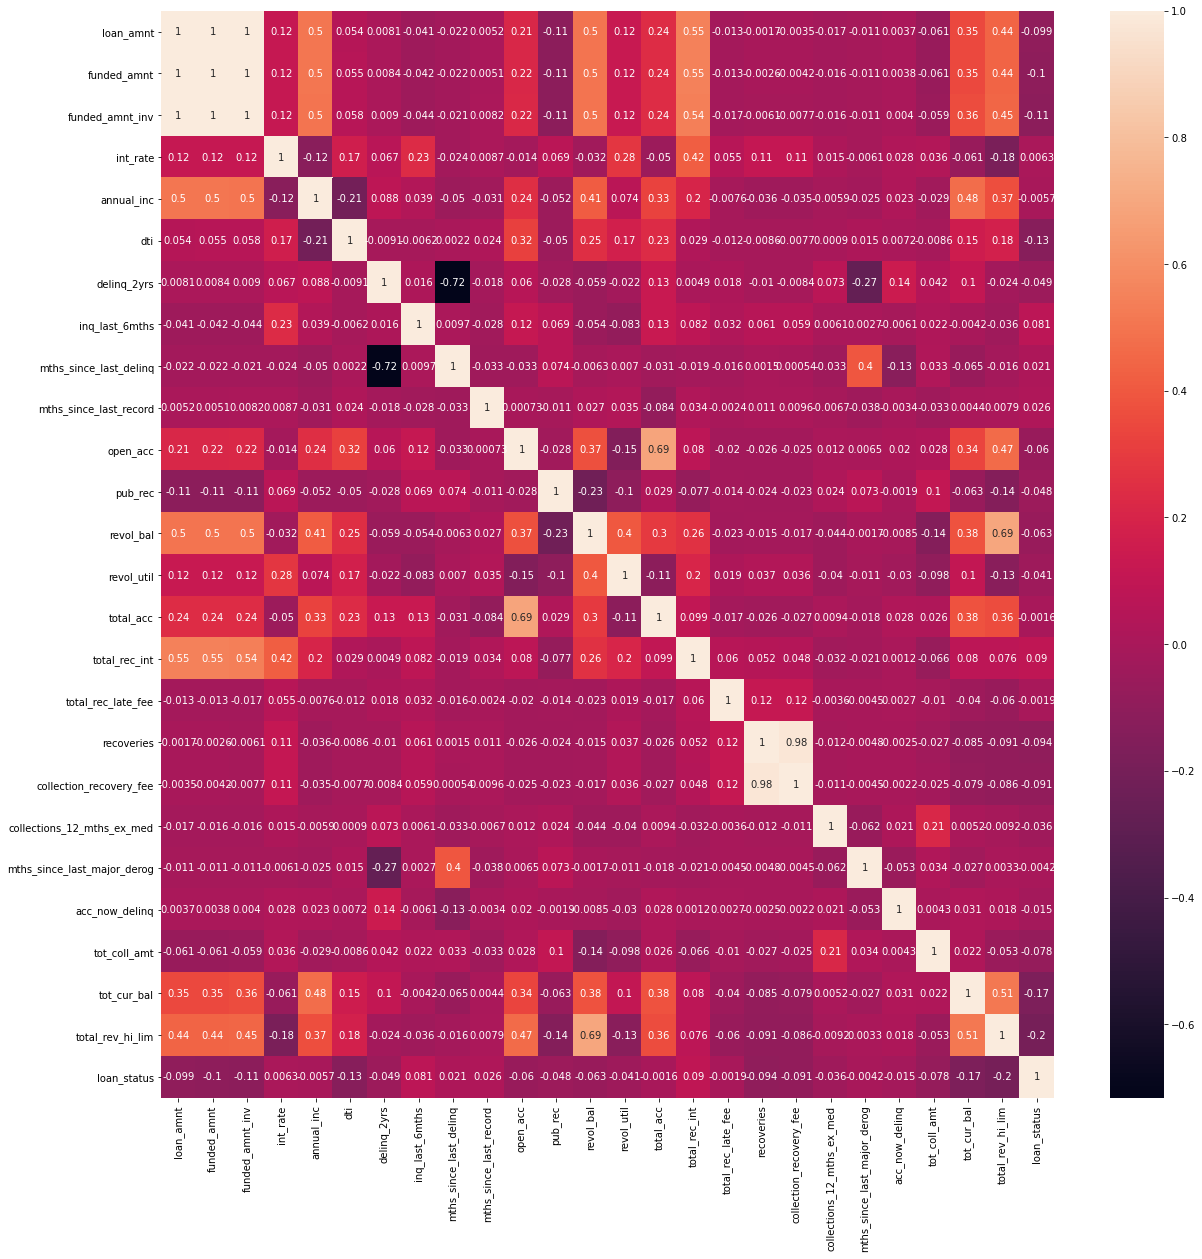

In [20]:
corrmat = data.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

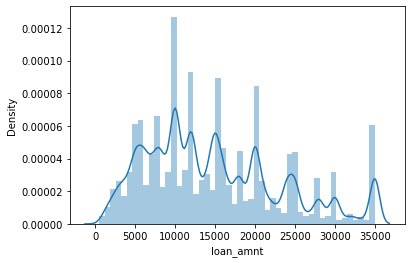

In [22]:
sns.distplot(data['loan_amnt'])  

In [26]:
Numerical_feature=['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','annual_inc','dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq',
'mths_since_last_record','open_acc','pub_rec','revol_bal','revol_util','total_acc','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
'collections_12_mths_ex_med','mths_since_last_major_derog','acc_now_delinq','tot_coll_amt','tot_cur_bal','total_rev_hi_lim']

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


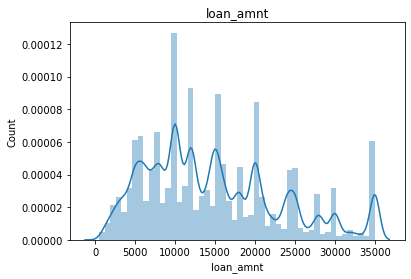

<Figure size 1080x1080 with 0 Axes>

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


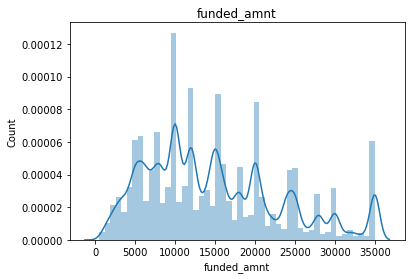

<Figure size 1080x1080 with 0 Axes>

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


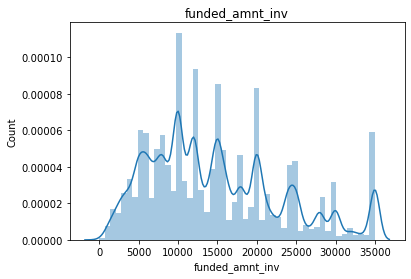

<Figure size 1080x1080 with 0 Axes>

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


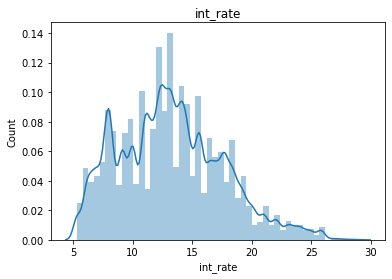

<Figure size 1080x1080 with 0 Axes>

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


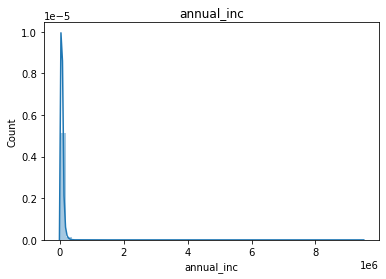

<Figure size 1080x1080 with 0 Axes>

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


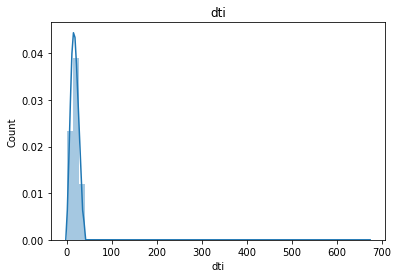

<Figure size 1080x1080 with 0 Axes>

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


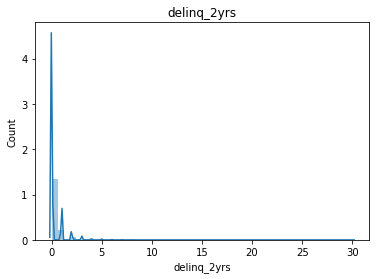

<Figure size 1080x1080 with 0 Axes>

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


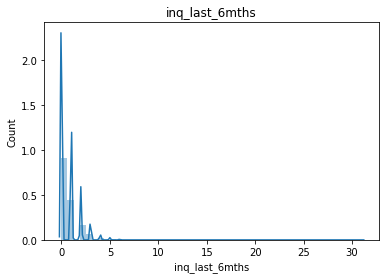

<Figure size 1080x1080 with 0 Axes>

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


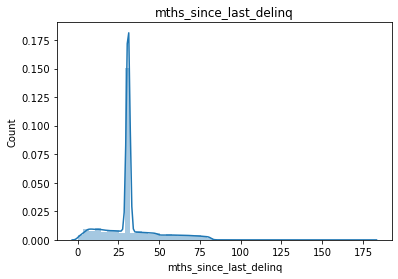

<Figure size 1080x1080 with 0 Axes>

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


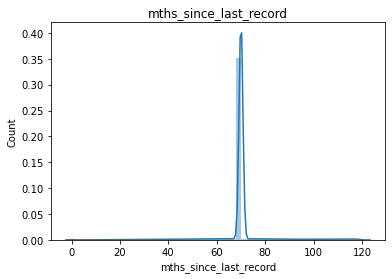

<Figure size 1080x1080 with 0 Axes>

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


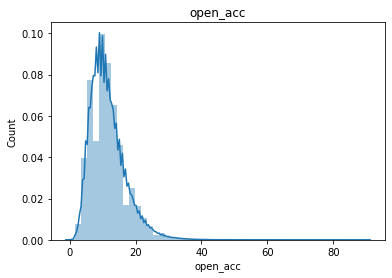

<Figure size 1080x1080 with 0 Axes>

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


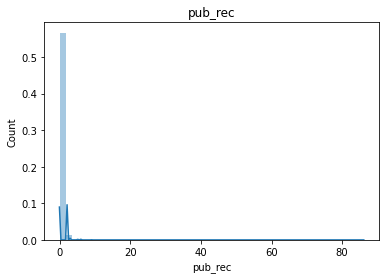

<Figure size 1080x1080 with 0 Axes>

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


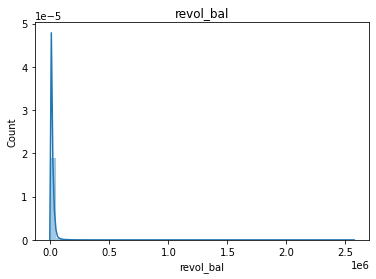

<Figure size 1080x1080 with 0 Axes>

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


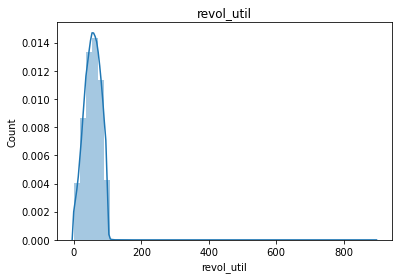

<Figure size 1080x1080 with 0 Axes>

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


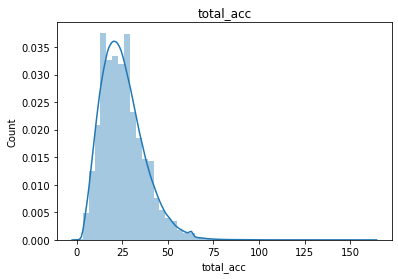

<Figure size 1080x1080 with 0 Axes>

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


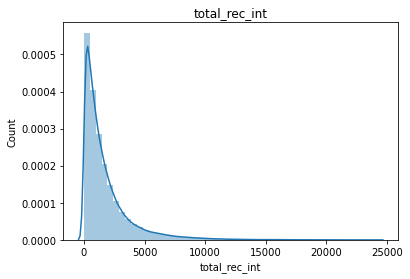

<Figure size 1080x1080 with 0 Axes>

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


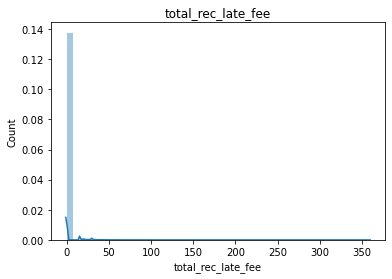

<Figure size 1080x1080 with 0 Axes>

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


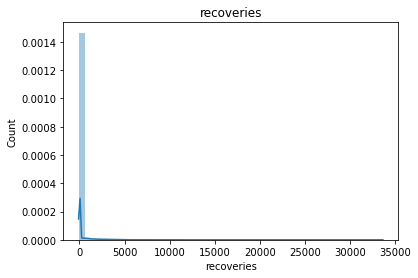

<Figure size 1080x1080 with 0 Axes>

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


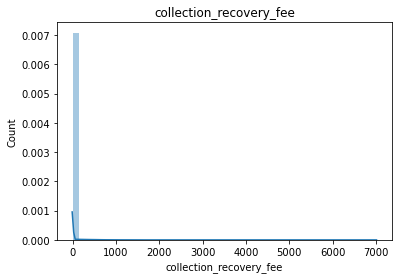

<Figure size 1080x1080 with 0 Axes>

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


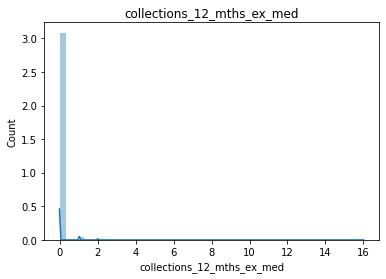

<Figure size 1080x1080 with 0 Axes>

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


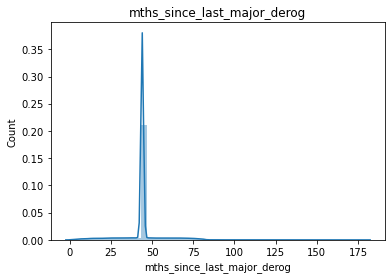

<Figure size 1080x1080 with 0 Axes>

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


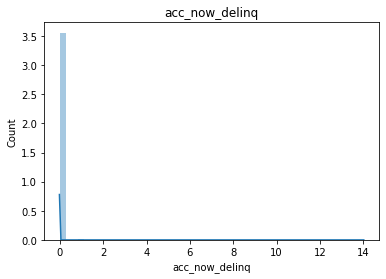

<Figure size 1080x1080 with 0 Axes>

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


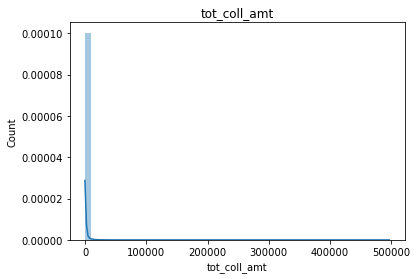

<Figure size 1080x1080 with 0 Axes>

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


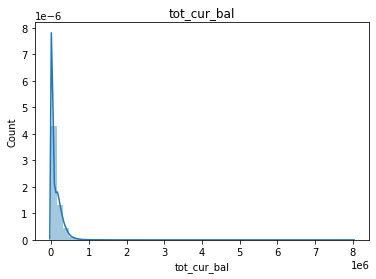

<Figure size 1080x1080 with 0 Axes>

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


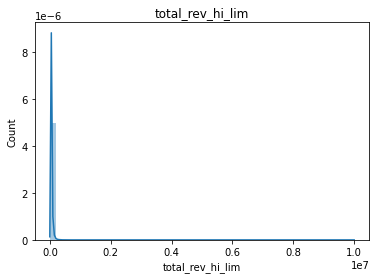

<Figure size 1080x1080 with 0 Axes>

In [27]:
for feature in Numerical_feature:
    sns.distplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

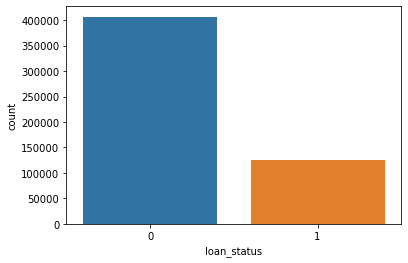

In [28]:
len(data['loan_status'].unique())
data['loan_status'].value_counts()
sns.countplot(data['loan_status'])

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='initial_list_status', ylabel='count'>

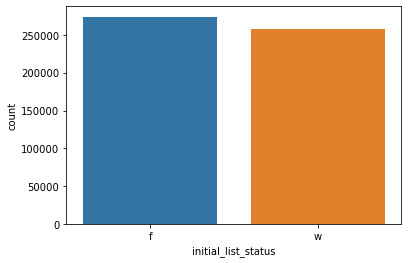

In [29]:
len(data['initial_list_status'].unique())
data['initial_list_status'].value_counts()
sns.countplot(data['initial_list_status'])

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='application_type', ylabel='count'>

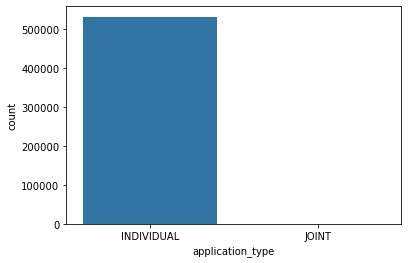

In [30]:
len(data['application_type'].unique())
data['application_type'].value_counts()
sns.countplot(data['application_type'])

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='verification_status_joint', ylabel='count'>

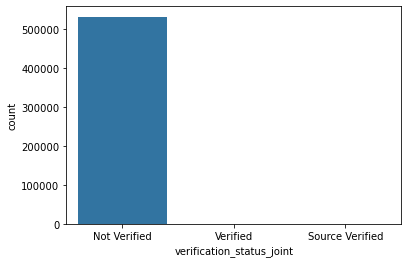

In [31]:
len(data['verification_status_joint'].unique())
data['verification_status_joint'].value_counts()
sns.countplot(data['verification_status_joint'])

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='count'>

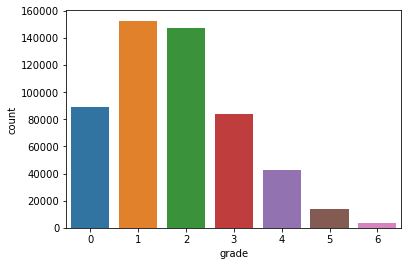

In [37]:
len(data['grade'].unique())
data['grade'].value_counts()
sns.countplot(data['grade'])

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

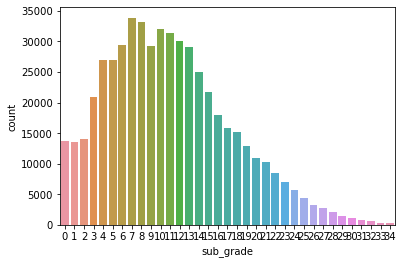

In [38]:
len(data['sub_grade'].unique())
data['sub_grade'].value_counts()
sns.countplot(data['sub_grade'])

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='verification_status', ylabel='count'>

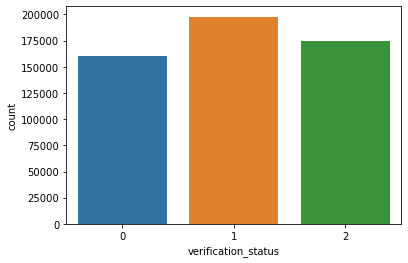

In [39]:
len(data['verification_status'].unique())
data['verification_status'].value_counts()
sns.countplot(data['verification_status'])

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='term', ylabel='count'>

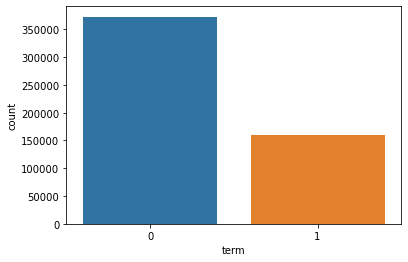

In [40]:
len(data['term'].unique())
data['term'].value_counts()
sns.countplot(data['term'])

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


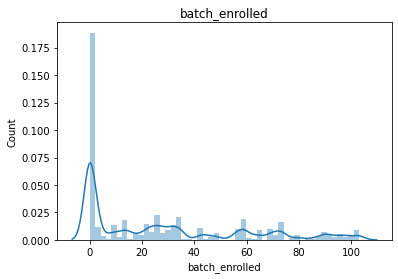

<Figure size 1080x1080 with 0 Axes>

In [43]:
sns.distplot(data['batch_enrolled'])
plt.xlabel('batch_enrolled')
plt.ylabel("Count")
plt.title('batch_enrolled')
plt.figure(figsize=(15,15))
plt.show()

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='home_ownership', ylabel='count'>

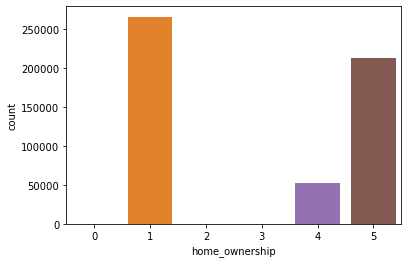

In [44]:
len(data['home_ownership'].unique())
data['home_ownership'].value_counts()
sns.countplot(data['home_ownership'])

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


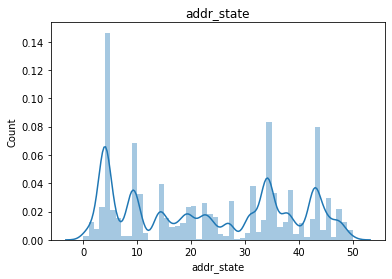

<Figure size 1080x1080 with 0 Axes>

In [45]:
sns.distplot(data['addr_state'])
plt.xlabel('addr_state')
plt.ylabel("Count")
plt.title('addr_state')
plt.figure(figsize=(15,15))
plt.show()

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


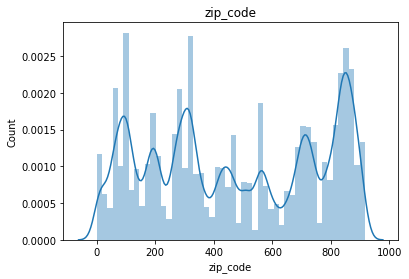

<Figure size 1080x1080 with 0 Axes>

In [47]:
sns.distplot(data['zip_code'])
plt.xlabel('zip_code')
plt.ylabel("Count")
plt.title('zip_code')
plt.figure(figsize=(15,15))
plt.show()

Lets Check the outliers

C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ravi\anaconda3\lib\site-p

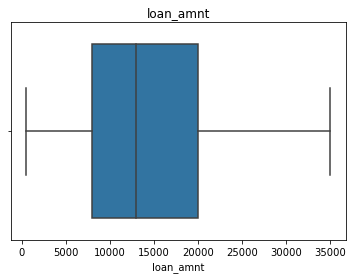

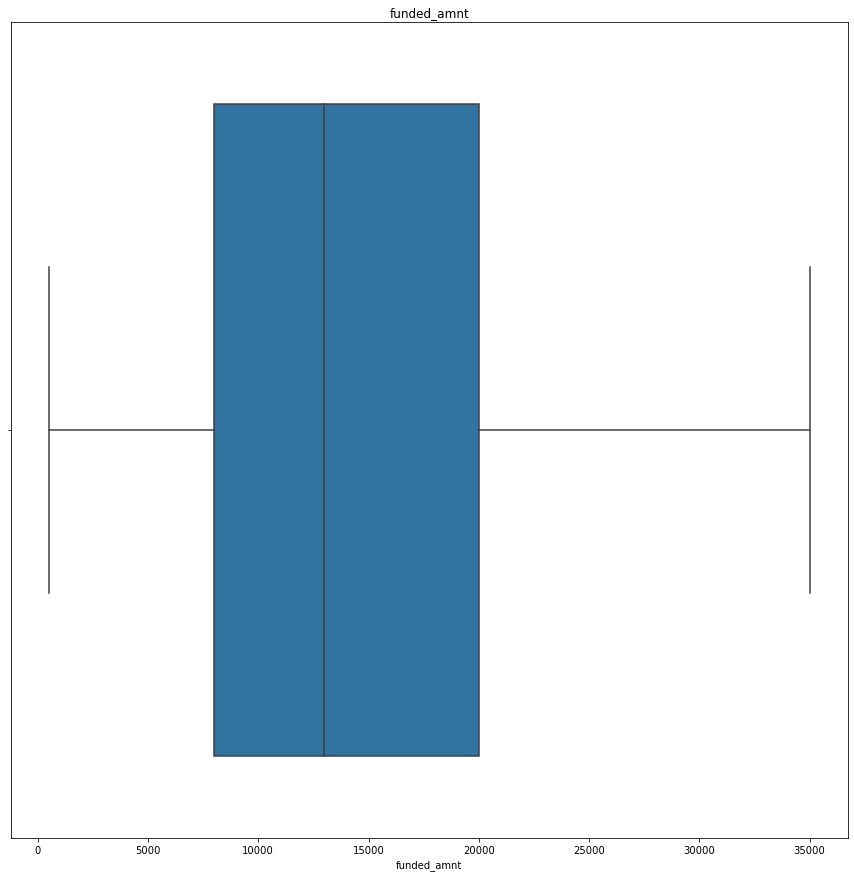

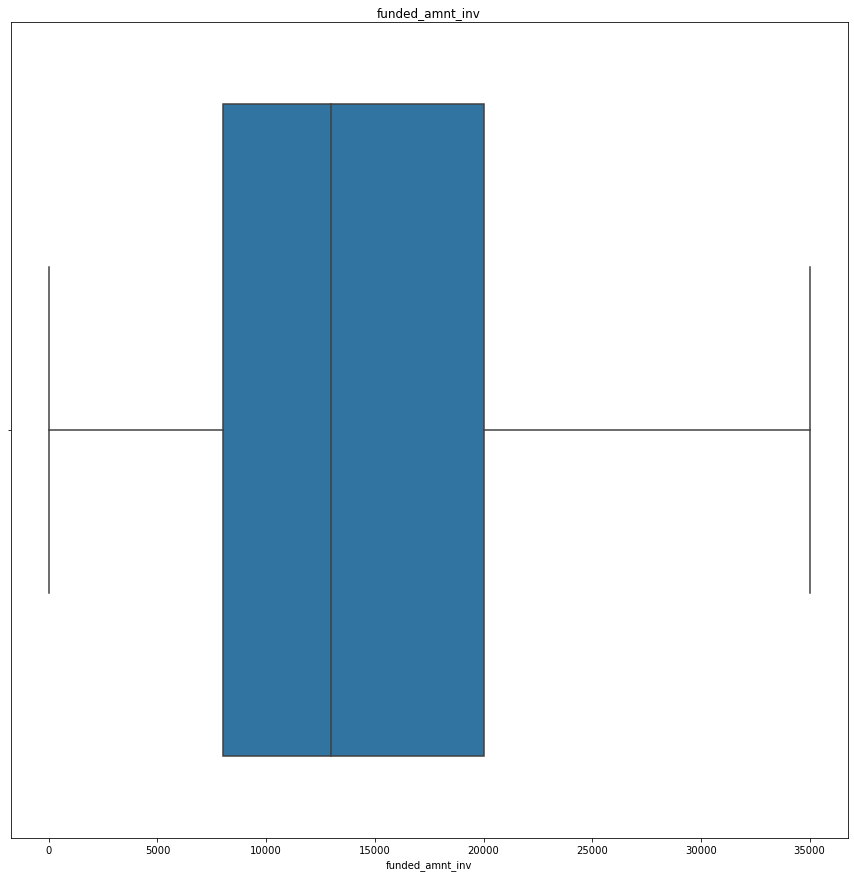

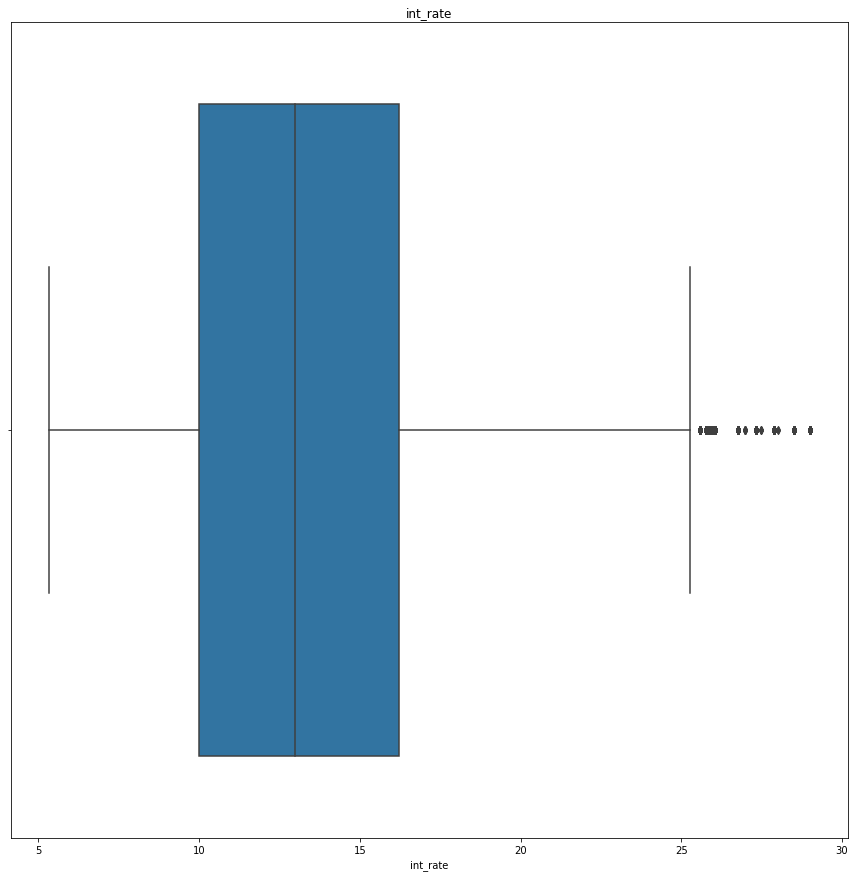

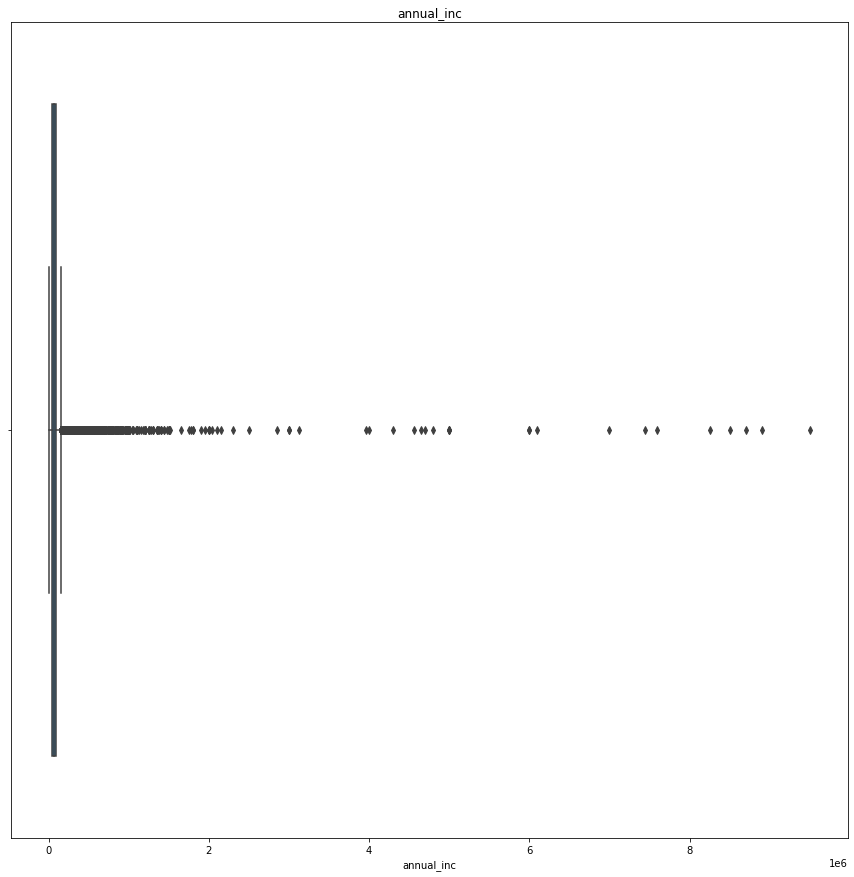

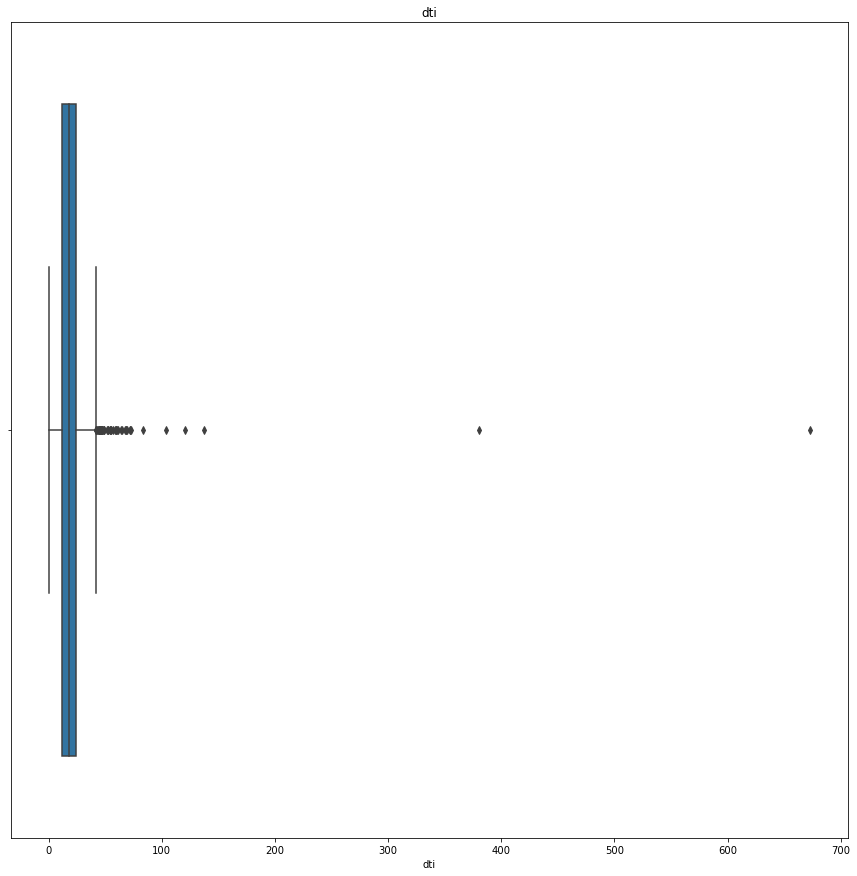

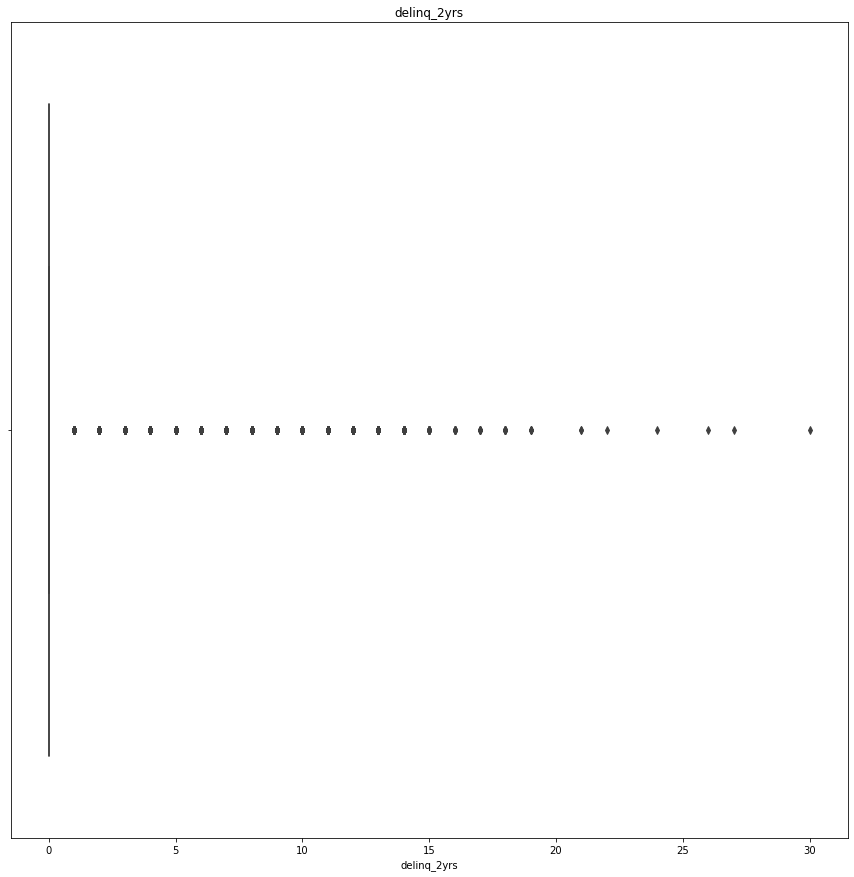

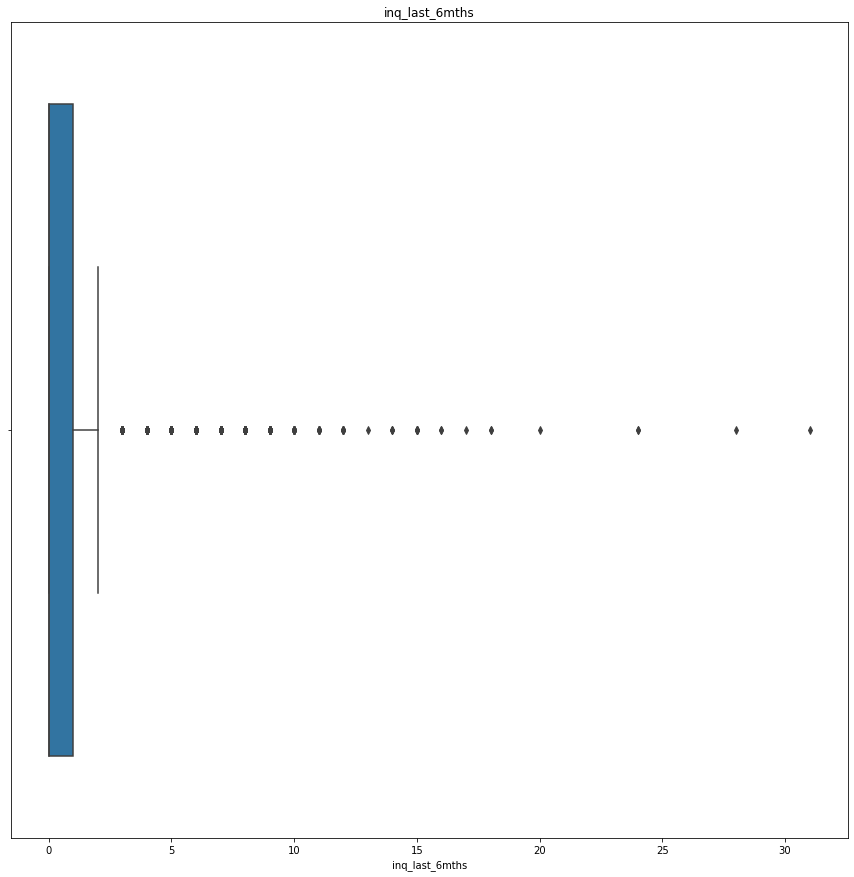

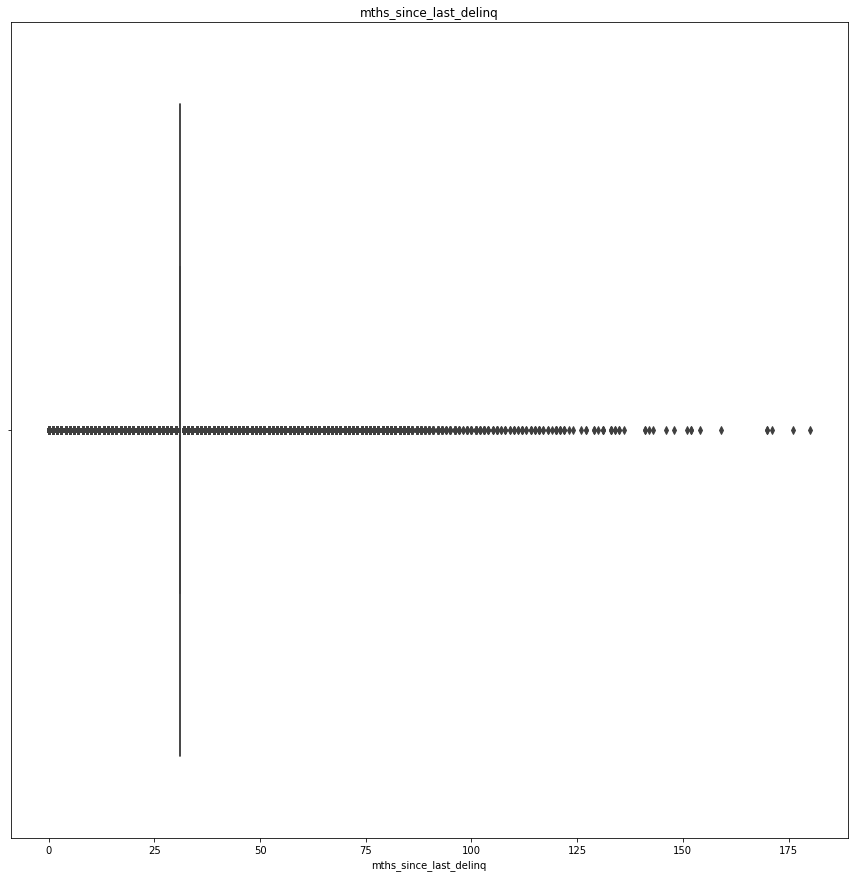

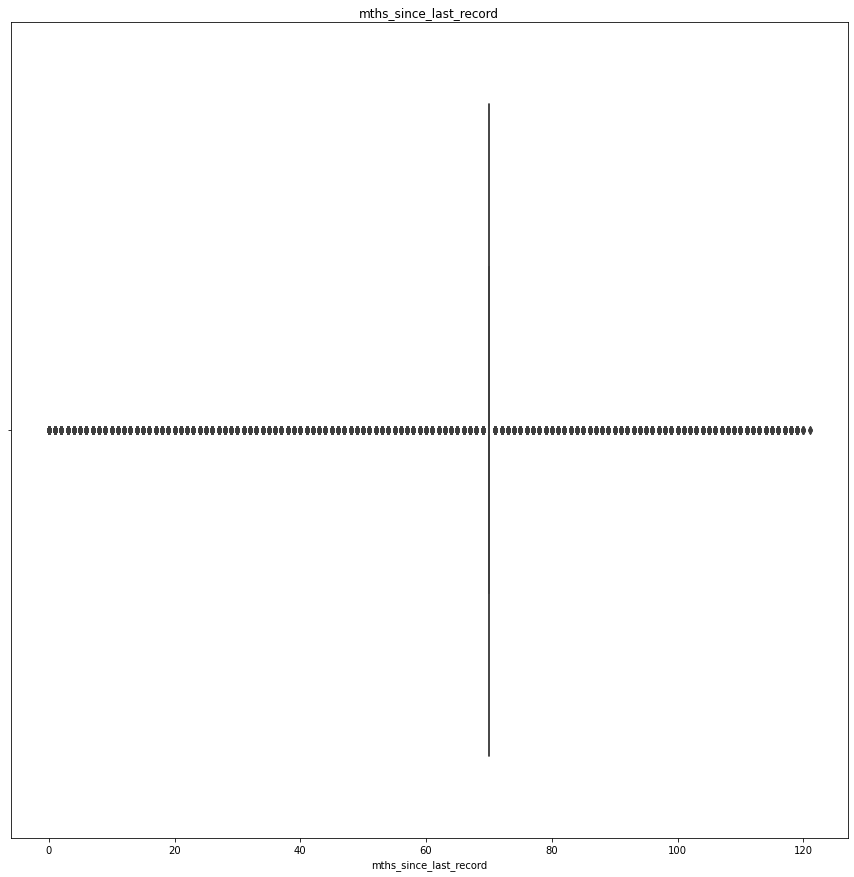

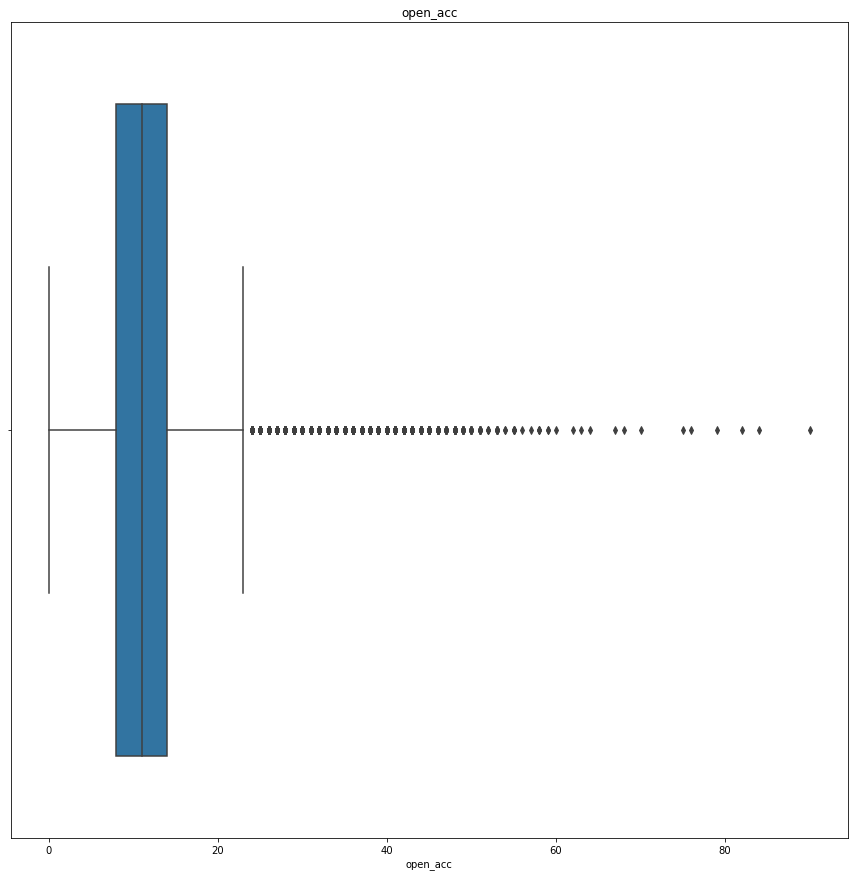

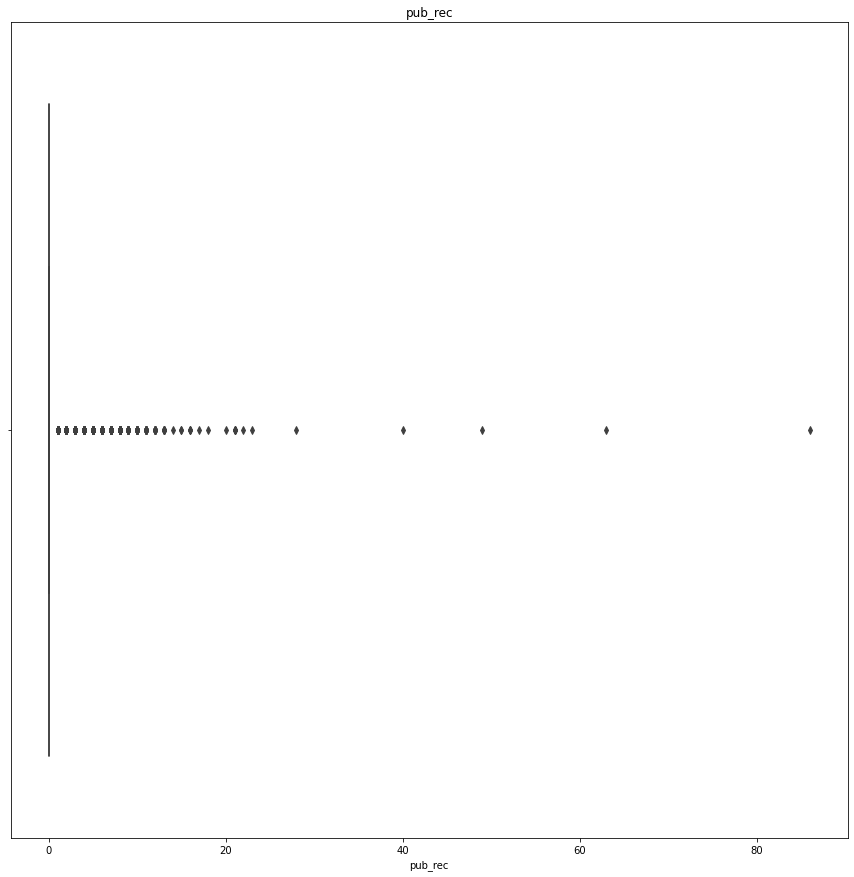

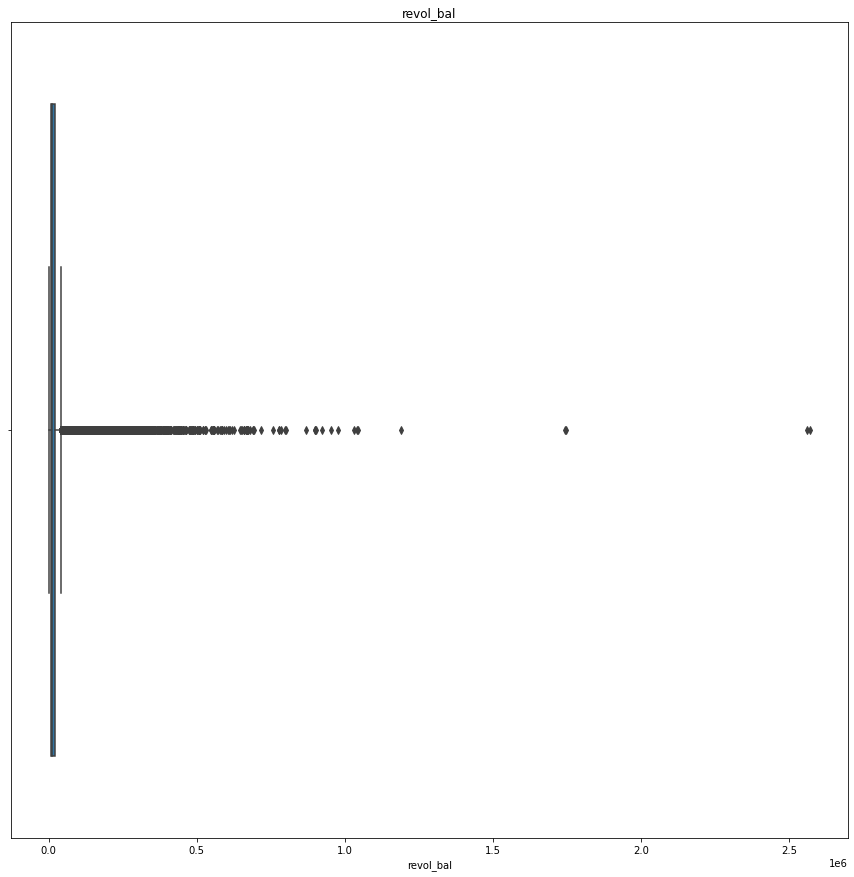

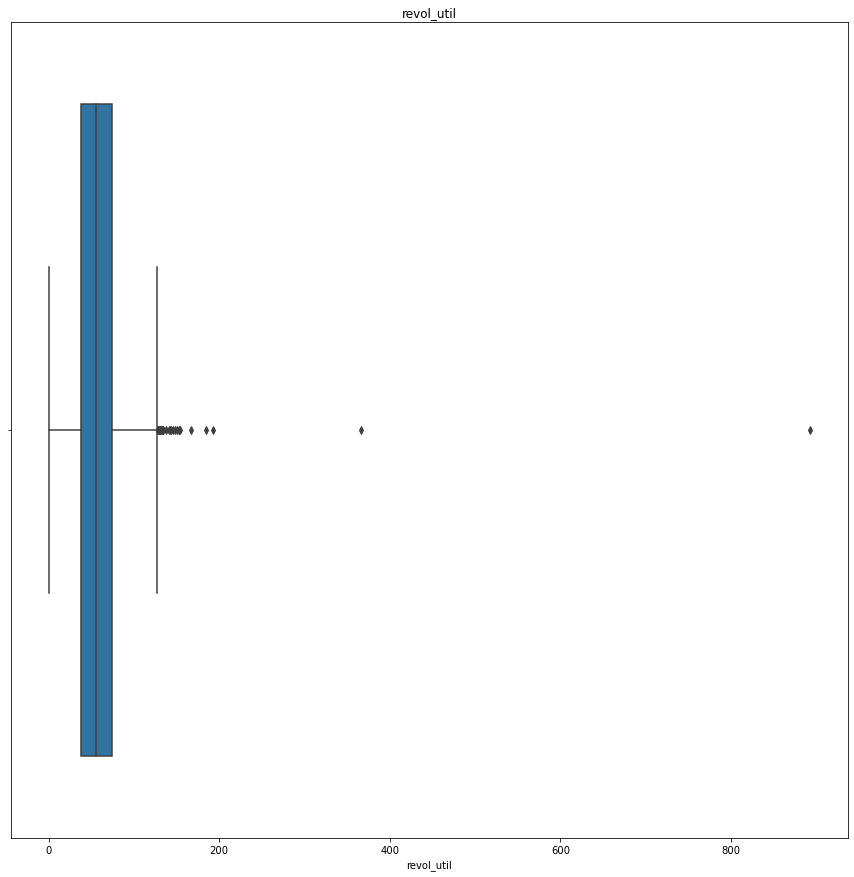

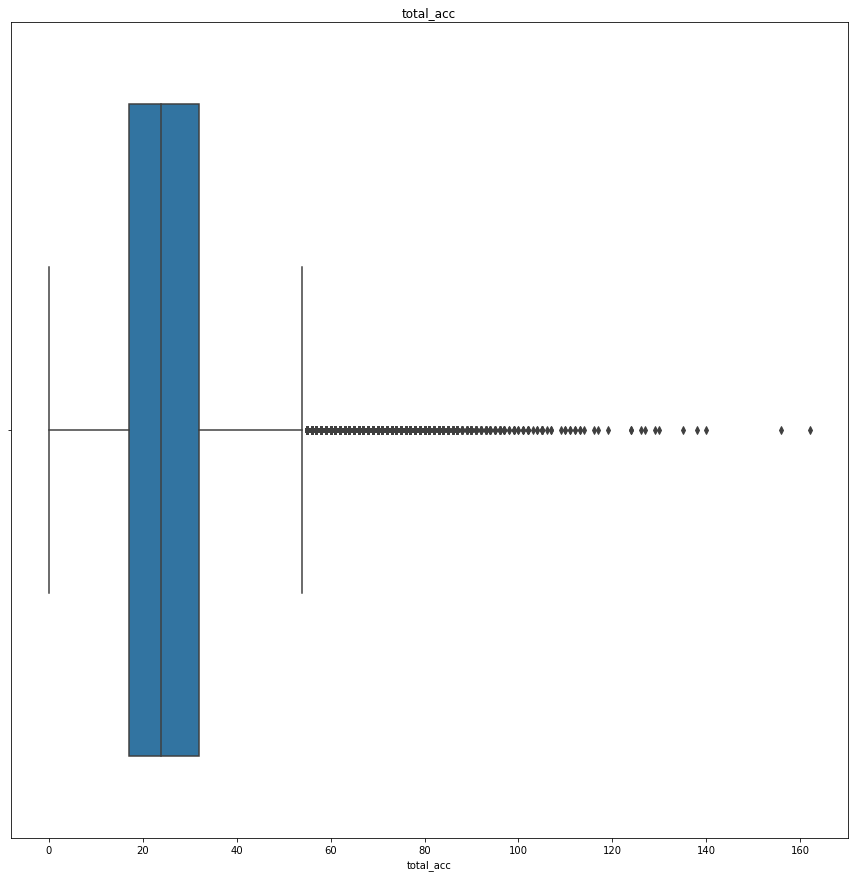

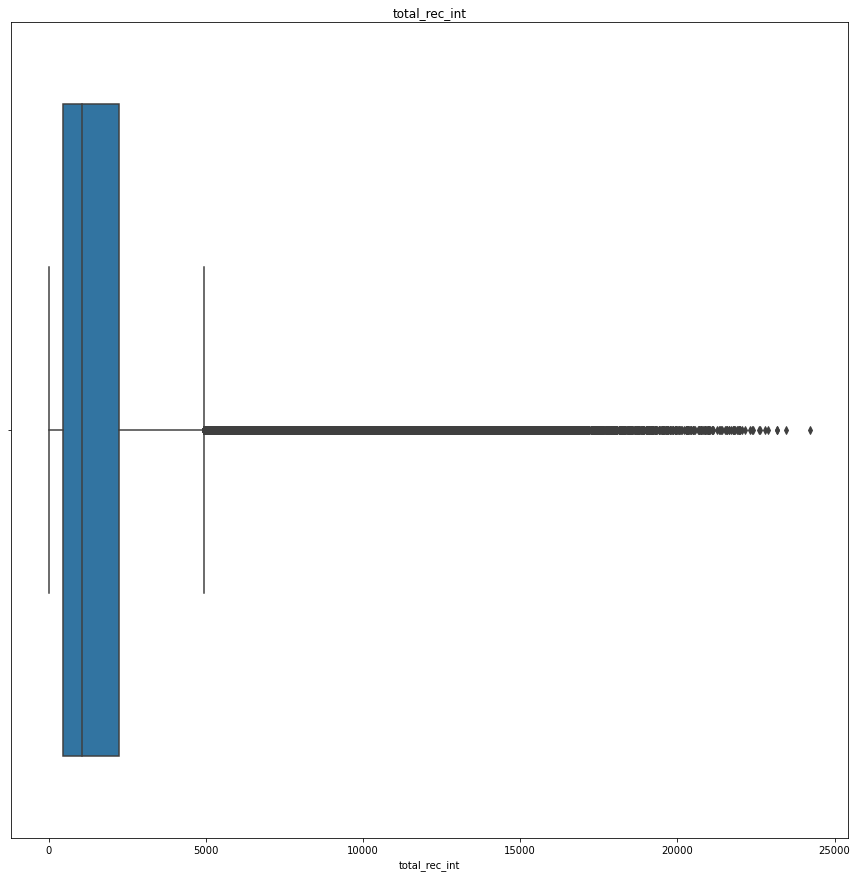

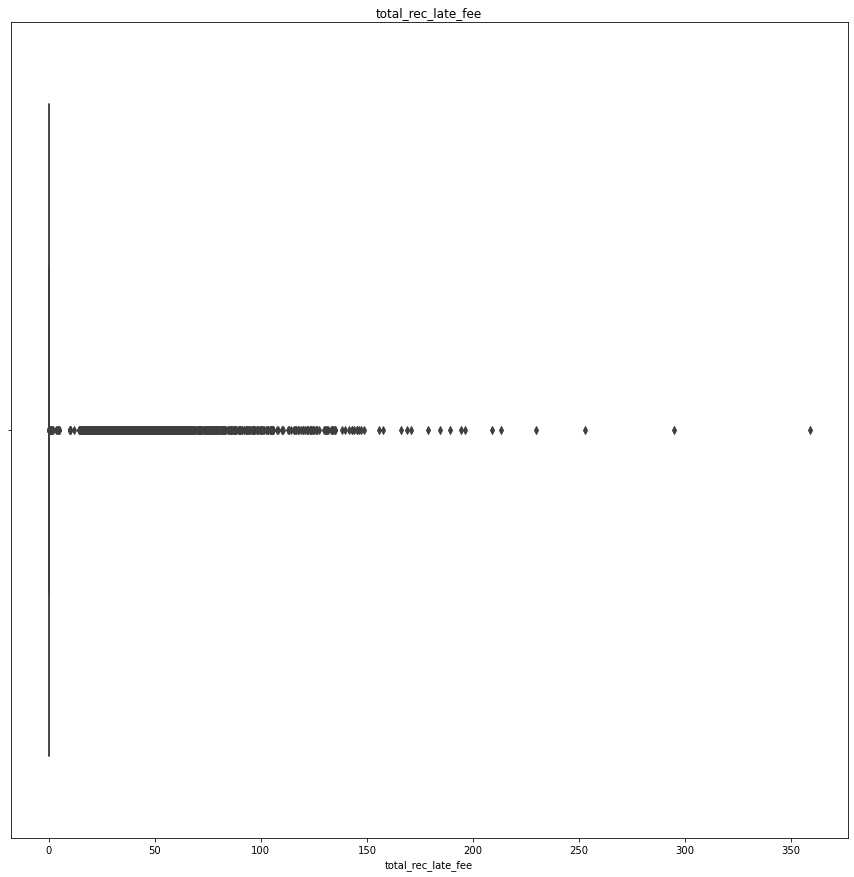

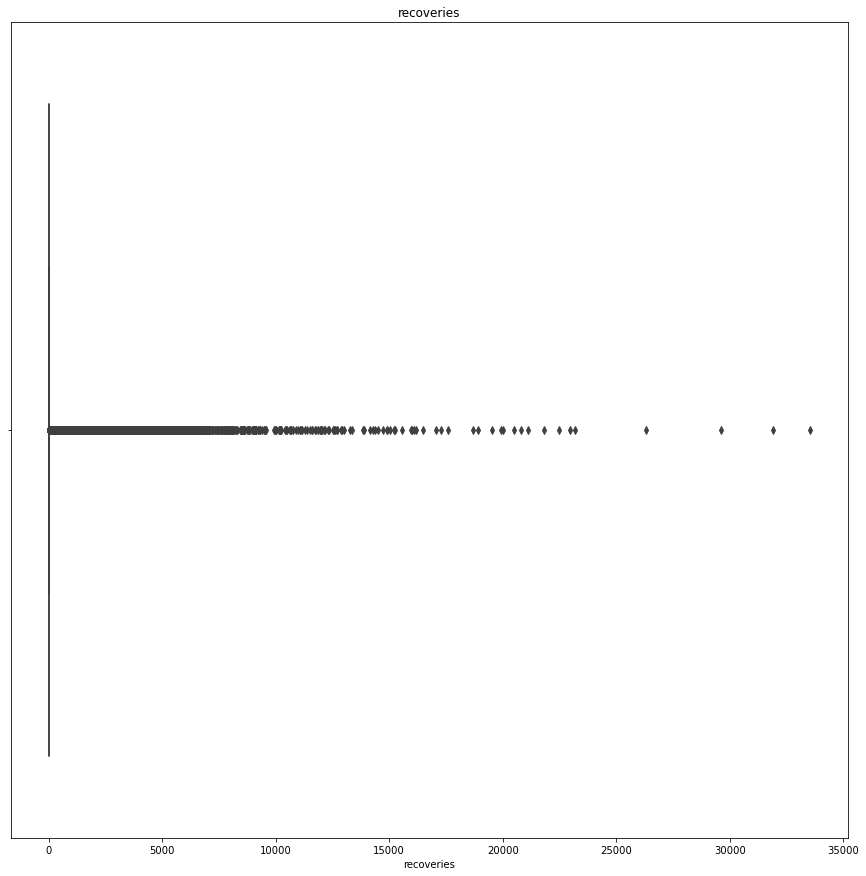

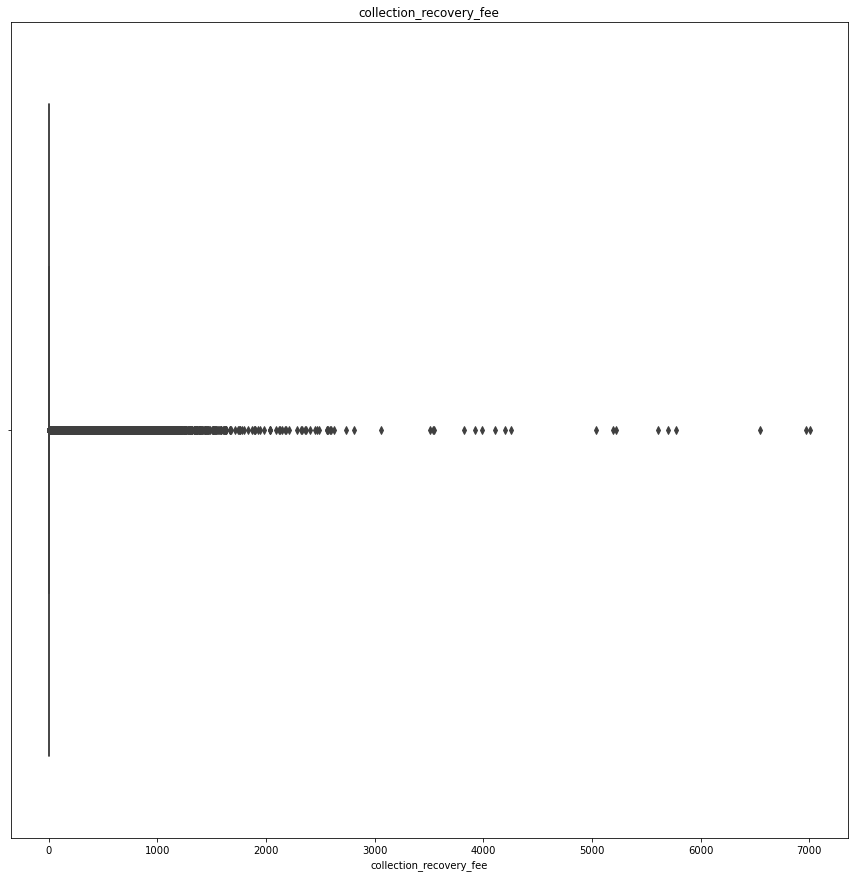

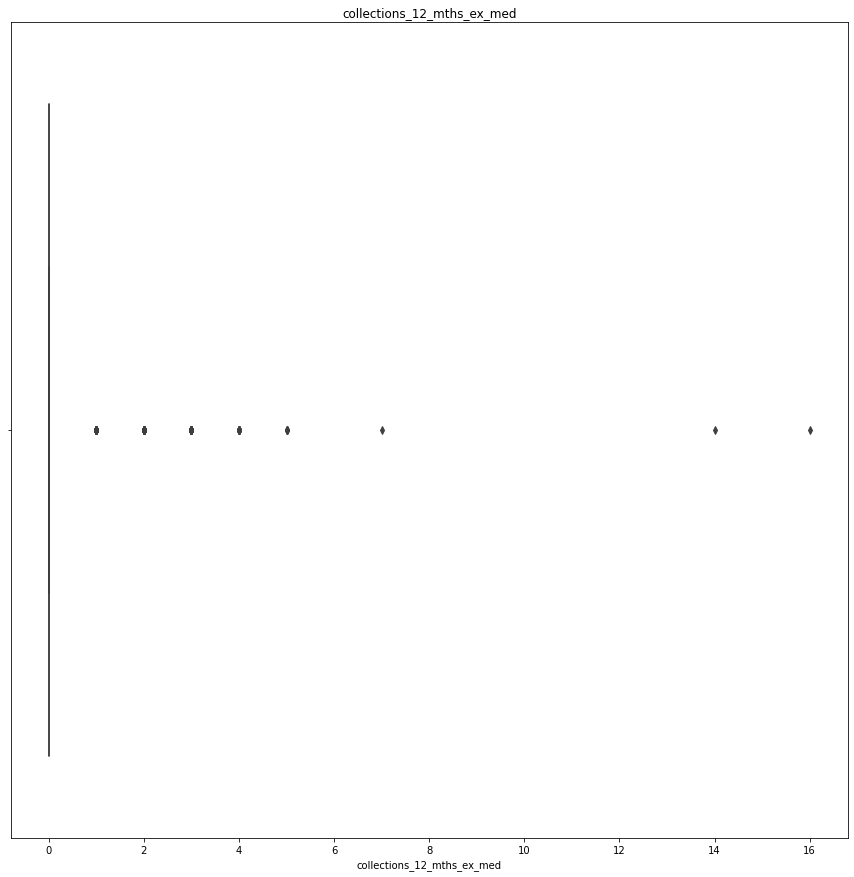

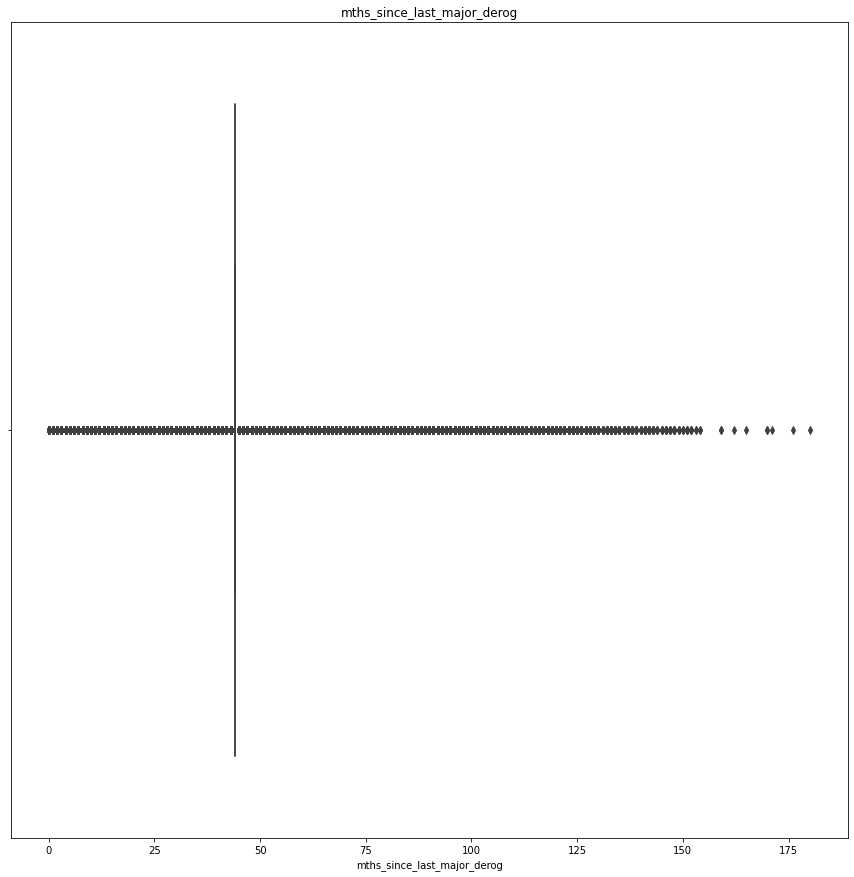

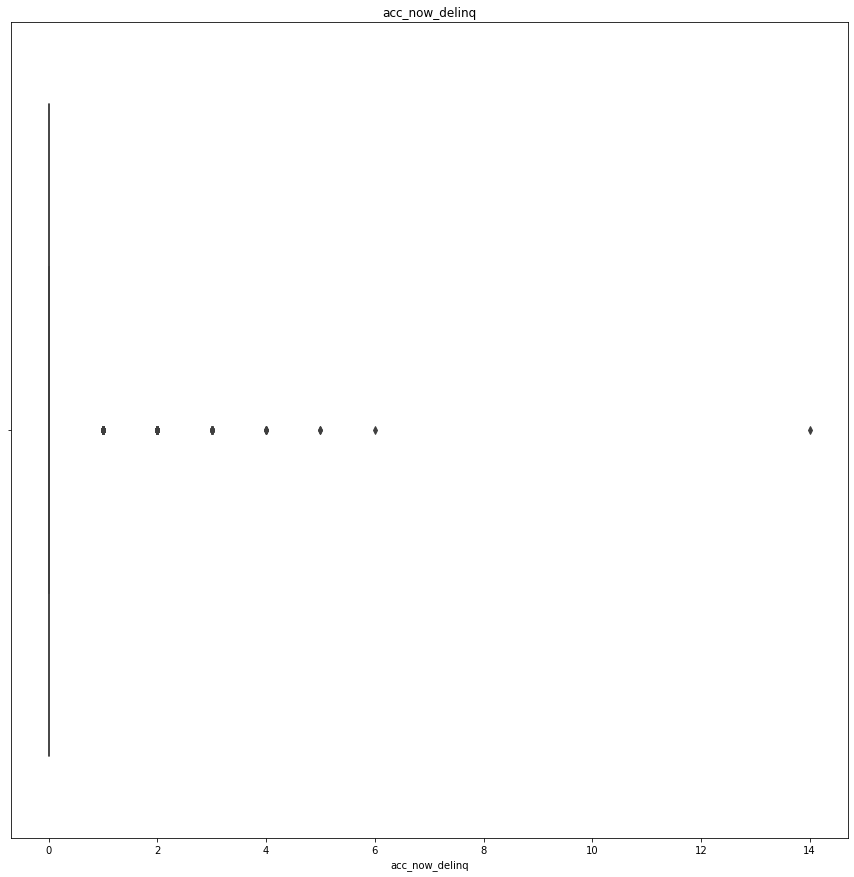

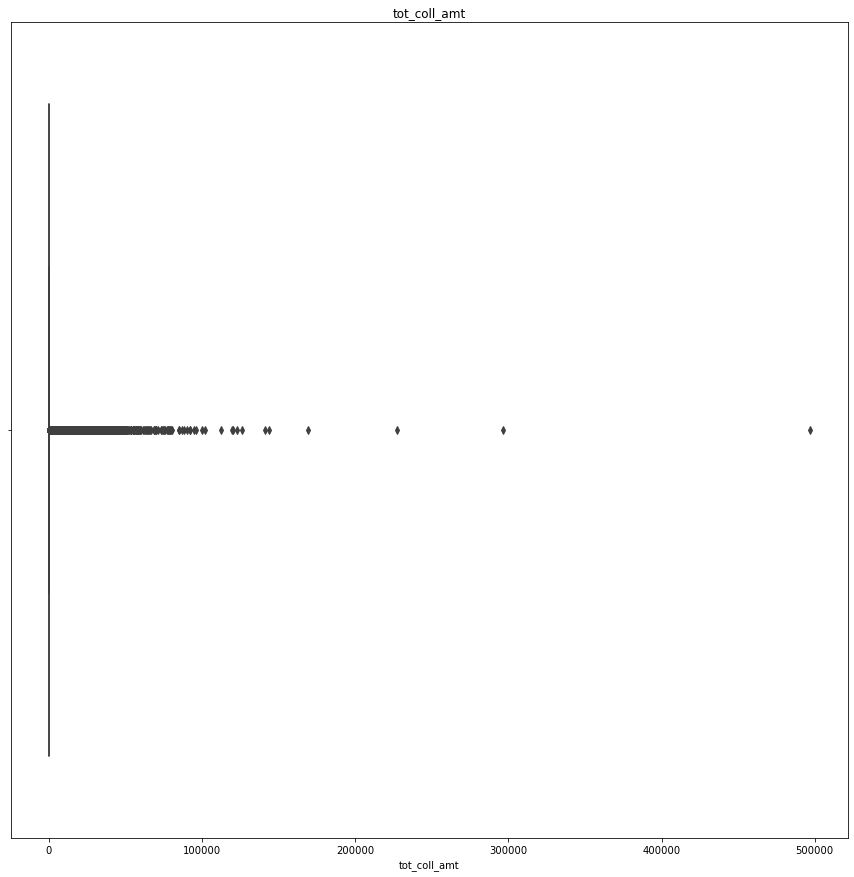

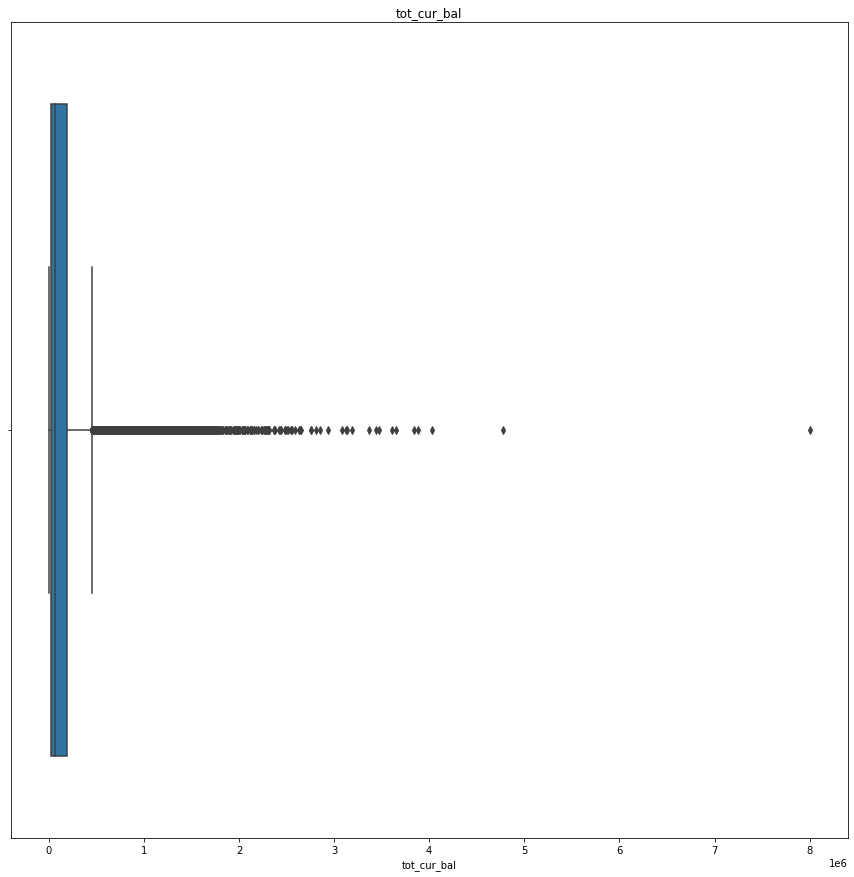

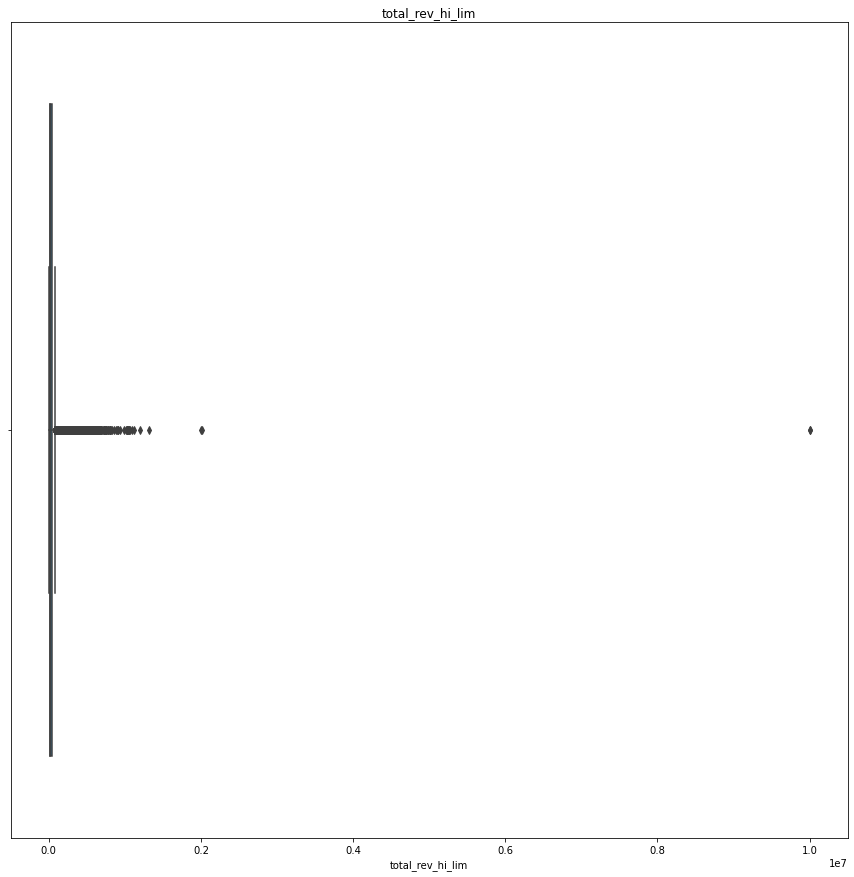

<Figure size 1080x1080 with 0 Axes>

In [49]:
for feature in Numerical_feature:
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

# Feature Engineering

Converting Categorical to Numerical by LabelEncoding

In [50]:
string_columns=['term','batch_enrolled','grade','sub_grade','emp_length','home_ownership','verification_status','pymnt_plan','desc','purpose','zip_code','addr_state','initial_list_status','application_type','verification_status_joint','last_week_pay']

In [51]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

for i in string_columns:
    data[i]=label_encoder.fit_transform(data[i]) 

In [52]:
data.head(10)    

,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_length,home_ownership,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,14350,14350,14350.0,0,0,19.19,4,22,9,4,...,0.0,74.0,0,0,62,0.0,0.0,28699.0,30800.0,0
1,4800,4800,4800.0,0,9,10.99,1,8,10,1,...,0.0,44.0,0,0,96,0.0,0.0,9974.0,32900.0,0
2,10000,10000,10000.0,0,9,7.26,0,3,2,4,...,0.0,44.0,0,0,96,0.0,65.0,38295.0,34900.0,0
3,15000,15000,15000.0,0,80,19.72,3,19,1,5,...,0.0,44.0,0,0,13,0.0,0.0,55564.0,24700.0,0
4,16000,16000,16000.0,0,35,10.64,1,6,1,5,...,0.0,44.0,0,0,95,0.0,0.0,47159.0,47033.0,0
5,15000,15000,14950.0,0,32,8.90,0,4,2,1,...,0.0,44.0,0,0,5,0.0,0.0,350619.0,29500.0,0
6,5000,5000,4975.0,0,0,7.90,0,3,5,5,...,0.0,44.0,0,0,6,0.0,1023.0,13272.0,55500.0,1
7,6000,6000,6000.0,0,0,9.17,1,5,8,1,...,0.0,54.0,0,0,86,0.0,0.0,272579.0,11800.0,0
8,6000,6000,6000.0,0,64,13.99,2,13,7,1,...,0.0,44.0,0,0,75,0.0,0.0,281521.0,62100.0,0
9,34550,34550,34550.0,1,73,17.14,3,18,2,1,...,0.0,44.0,0,0,78,0.0,0.0,76034.0,33200.0,0


In [53]:
X=data.drop(columns=['loan_status'])
X 

,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_length,home_ownership,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,14350,14350,14350.0,0,0,19.19,4,22,9,4,...,0.0,0.0,74.0,0,0,62,0.0,0.0,28699.0,30800.0
1,4800,4800,4800.0,0,9,10.99,1,8,10,1,...,0.0,0.0,44.0,0,0,96,0.0,0.0,9974.0,32900.0
2,10000,10000,10000.0,0,9,7.26,0,3,2,4,...,0.0,0.0,44.0,0,0,96,0.0,65.0,38295.0,34900.0
3,15000,15000,15000.0,0,80,19.72,3,19,1,5,...,0.0,0.0,44.0,0,0,13,0.0,0.0,55564.0,24700.0
4,16000,16000,16000.0,0,35,10.64,1,6,1,5,...,0.0,0.0,44.0,0,0,95,0.0,0.0,47159.0,47033.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,20000,20000,20000.0,0,0,12.49,1,9,1,1,...,0.0,0.0,44.0,0,0,82,0.0,0.0,83087.0,24800.0
532424,12000,12000,12000.0,1,19,14.99,2,14,1,1,...,0.0,0.0,44.0,0,0,84,0.0,0.0,227812.0,17800.0
532425,18725,18725,18725.0,1,0,20.80,4,20,8,5,...,0.0,0.0,44.0,0,0,96,0.0,0.0,26010.0,24200.0
532426,21000,21000,21000.0,1,43,16.29,3,16,0,5,...,0.0,0.0,44.0,0,0,86,0.0,0.0,29197.0,23300.0


In [54]:
Y=data['loan_status']
Y 

0         0
1         0
2         0
3         0
4         0
         ..
532423    0
532424    0
532425    1
532426    0
532427    0
Name: loan_status, Length: 532428, dtype: int64

# Feature Selection

Feature importance using ExtraTreesClassifier

In [56]:
feat_imp = ExtraTreesClassifier()
feat_imp.fit(X,Y)

ExtraTreesClassifier()

In [57]:
print(feat_imp.feature_importances_) 

[2.64365536e-02 2.65189964e-02 2.78371631e-02 1.36324979e-02
 5.72816250e-02 4.77956775e-02 1.99548678e-02 3.36559475e-02
 2.46806035e-02 1.41980386e-02 2.70956746e-02 1.62280619e-02
 3.55501267e-06 6.94536331e-02 2.22567114e-02 2.74989733e-02
 2.56431918e-02 3.32990642e-02 1.18538269e-02 2.13085028e-02
 2.19938656e-02 1.18336477e-02 2.62985380e-02 1.04833021e-02
 2.64773137e-02 2.91784263e-02 2.79572247e-02 4.01271767e-02
 4.31132138e-02 3.24195424e-03 1.41110053e-02 8.31117398e-03
 1.86143939e-03 1.72952467e-02 2.77742303e-05 9.03437063e-06
 7.60277461e-02 8.02513131e-04 1.17512777e-02 3.87991772e-02
 4.36657834e-02]


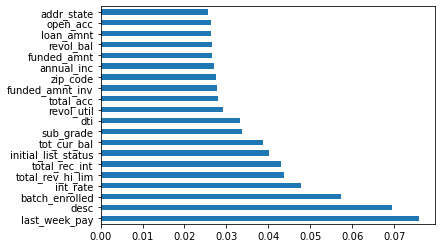

In [58]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(feat_imp.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show() 

# Check whether the data is Balanced or not

In [59]:
Y.value_counts() 

0    406601
1    125827
Name: loan_status, dtype: int64

From the data we came to know that data is containing 75% of Genuine/Non-Defaulters data (1) and 25% of Fraudulent/Defaulters (0) data.
This imbalance may create biasness in the model towards Genuine data, So Over Sampling is done to balance the data

Random Over Sampling

In [60]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(sampling_strategy='minority')
X_over, Y_over = os.fit_resample(X, Y)
X_over.shape,Y_over.shape

((813202, 41), (813202,))

In [61]:
from collections import Counter
print(Counter(Y))
print(Counter(Y_over))

Counter({0: 406601, 1: 125827})
Counter({0: 406601, 1: 406601})


# Model Building

Splitting data in to partitions for Training and Testing.
80% of data for Training the model and 20% of data or Testing the model

In [64]:
x_train,x_test,y_train,y_test=train_test_split(X_over,Y_over,test_size=0.2)

In [65]:
x_test=x_test.reset_index(drop=True)

y_test=pd.DataFrame(y_test)
y_test=y_test.reset_index(drop=True)

# Model Building using Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,random_state=3)
rf.fit(x_train,y_train)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred_rf=rf.predict(x_test)
print(confusion_matrix(y_test,y_pred_rf))
train_acc_rf=round(rf.score(x_train, y_train) * 100, 2)
test_acc_rf=round(accuracy_score(y_test,y_pred_rf)*100,2)
print('Train_Accuracy_score= {}'.format(train_acc_rf))
print("Test_Accuracy Score= {}".format(test_acc_rf))

print("Classification report: {}".format(classification_report(y_test,y_pred_rf)))

[[79373  1867]
 [ 2357 79044]]
Train_Accuracy_score= 100.0
Test_Accuracy Score= 97.4
Classification report:               precision    recall  f1-score   support

           0       0.97      0.98      0.97     81240
           1       0.98      0.97      0.97     81401

    accuracy                           0.97    162641
   macro avg       0.97      0.97      0.97    162641
weighted avg       0.97      0.97      0.97    162641



# Model Building using DecisionTree

In [68]:
from sklearn.tree import DecisionTreeClassifier as DS
model_ds=DS(criterion='entropy')
model_ds.fit(X_over,Y_over)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred_ds=model_ds.predict(x_test)
print(confusion_matrix(y_test,y_pred_ds))
train_acc_ds=round(model_ds.score(X_over, Y_over) * 100, 2)
test_acc_ds=round(accuracy_score(y_test,y_pred_ds)*100,2)
print('Train_Accuracy_score= {}'.format(train_acc_ds))
print("Test_Accuracy Score= {}".format(test_acc_ds))

print("Classification report: {}".format(classification_report(y_test,y_pred_ds)))

[[81240     0]
 [    0 81401]]
Train_Accuracy_score= 100.0
Test_Accuracy Score= 100.0
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     81240
           1       1.00      1.00      1.00     81401

    accuracy                           1.00    162641
   macro avg       1.00      1.00      1.00    162641
weighted avg       1.00      1.00      1.00    162641



# Model Building using Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_over,Y_over)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred_log=model_log.predict(x_test)
print(confusion_matrix(y_test,y_pred_log))
train_acc_log=round(model_log.score(X_over, Y_over) * 100, 2)
test_acc_log=round(accuracy_score(y_test,y_pred_log)*100,2)
print('Train_Accuracy_score= {}'.format(train_acc_log))
print("Test_Accuracy Score= {}".format(test_acc_log))


print("Classification report: {}".format(classification_report(y_test,y_pred_log)))

C:\Users\Ravi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[44892 36348]
 [27102 54299]]
Train_Accuracy_score= 61.09
Test_Accuracy Score= 60.99
Classification report:               precision    recall  f1-score   support

           0       0.62      0.55      0.59     81240
           1       0.60      0.67      0.63     81401

    accuracy                           0.61    162641
   macro avg       0.61      0.61      0.61    162641
weighted avg       0.61      0.61      0.61    162641



# Model Building using XGBoost

In [74]:
from xgboost import XGBClassifier
model_xg_b=XGBClassifier(class_weights='balanced')
model_xg_b.fit(X_over,Y_over)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred_xg_b=model_xg_b.predict(x_test)
print(confusion_matrix(y_test,y_pred_xg_b))
train_acc_xg_b=round(model_xg_b.score(X_over, Y_over) * 100, 2)
test_acc_xg_b=round(accuracy_score(y_test,y_pred_xg_b)*100,2)
print('Train_Accuracy_score= {}'.format(train_acc_xg_b))
print("Test_Accuracy Score= {}".format(test_acc_xg_b))

print("Classification report: {}".format(classification_report(y_test,y_pred_xg_b))) 

C:\Users\Ravi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:15:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weights" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:15:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ravi\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[[76499  4741]
 [ 9920 71481]]
Train_Accuracy_score= 90.97
Test_Accuracy Score= 90.99
Classification report:               precision    recall  f1-score   support

           0       0.89      0.94      0.91     81240
           1       0.94      0.88      0.91     81401

    accuracy                           0.91    162641
   macro avg       0.91      0.91      0.91    162641
weighted avg       0.91      0.91      0.91    162641



# ROC and AUC curve 

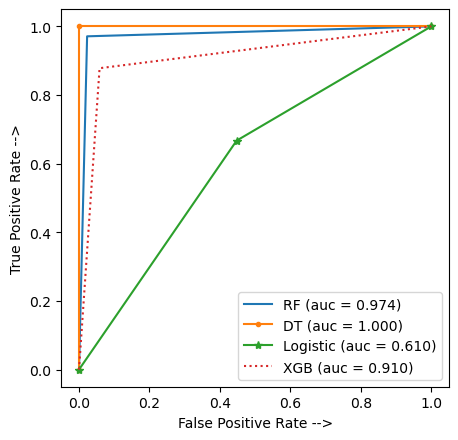

In [78]:
from sklearn.metrics import roc_curve, auc

RF_fpr, RF_tpr, threshold = roc_curve(y_test, y_pred_rf)
auc_RF = auc(RF_fpr, RF_tpr)

DT_fpr, DT_tpr, threshold = roc_curve(y_test, y_pred_ds)
auc_DT = auc(DT_fpr, DT_tpr)

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_log)
auc_logistic = auc(logistic_fpr, logistic_tpr)

XGB_fpr, XGB_tpr, threshold = roc_curve(y_test, y_pred_xg_b)
auc_XGB = auc(XGB_fpr, XGB_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(RF_fpr, RF_tpr, linestyle='-', label='RF (auc = %0.3f)' % auc_RF)
plt.plot(DT_fpr, DT_tpr, marker='.', label='DT (auc = %0.3f)' % auc_DT)
plt.plot(logistic_fpr, logistic_tpr, marker='*', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(XGB_fpr, XGB_tpr, linestyle=':', label='XGB (auc = %0.3f)' % auc_XGB)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

# As per ROC and AUC, More area under the curve better will be the Model. So as per the above models, better models are in order:

 DecisionTree>RandomForest>XGBoost>LogisticRegression